In [1]:
import os
import time
import glob
import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm     as colormap

plt.rcParams['figure.dpi']     = 300
plt.rcParams["font.size"]      = 12
plt.rcParams["font.family"]    = "sans-serif"
plt.rcParams["font.monospace"] = "Computer Modern Sans Serif"

pd.set_option('display.float_format', '{:.2E}'.format)

In [2]:
filename = "activities_efficiencies.ods"
tables = pd.read_excel(filename, sheet_name=["214Bi", "208Tl"])

In [3]:
bi = tables["214Bi"].set_index("G4Volume")
tl = tables["208Tl"].set_index("G4Volume")

assert (bi.index == tl.index).all()
v  = bi.index.values

In [4]:
# is upper limit?
bi.loc[:, "upperlim"] = False
bi.loc[       "ICS", "upperlim"] = True
bi.loc["FIELD_RING", "upperlim"] = True
bi.loc["SIPM_BOARD", "upperlim"] = True
bi.loc[    "VESSEL", "upperlim"] = True
bi.loc["SHIELDING_LEAD", "upperlim"] = True

tl.loc[:, "upperlim"] = False
tl.loc[       "ICS", "upperlim"] = True
tl.loc["FIELD_RING", "upperlim"] = True
tl.loc["SIPM_BOARD", "upperlim"] = True
tl.loc[    "VESSEL", "upperlim"] = True

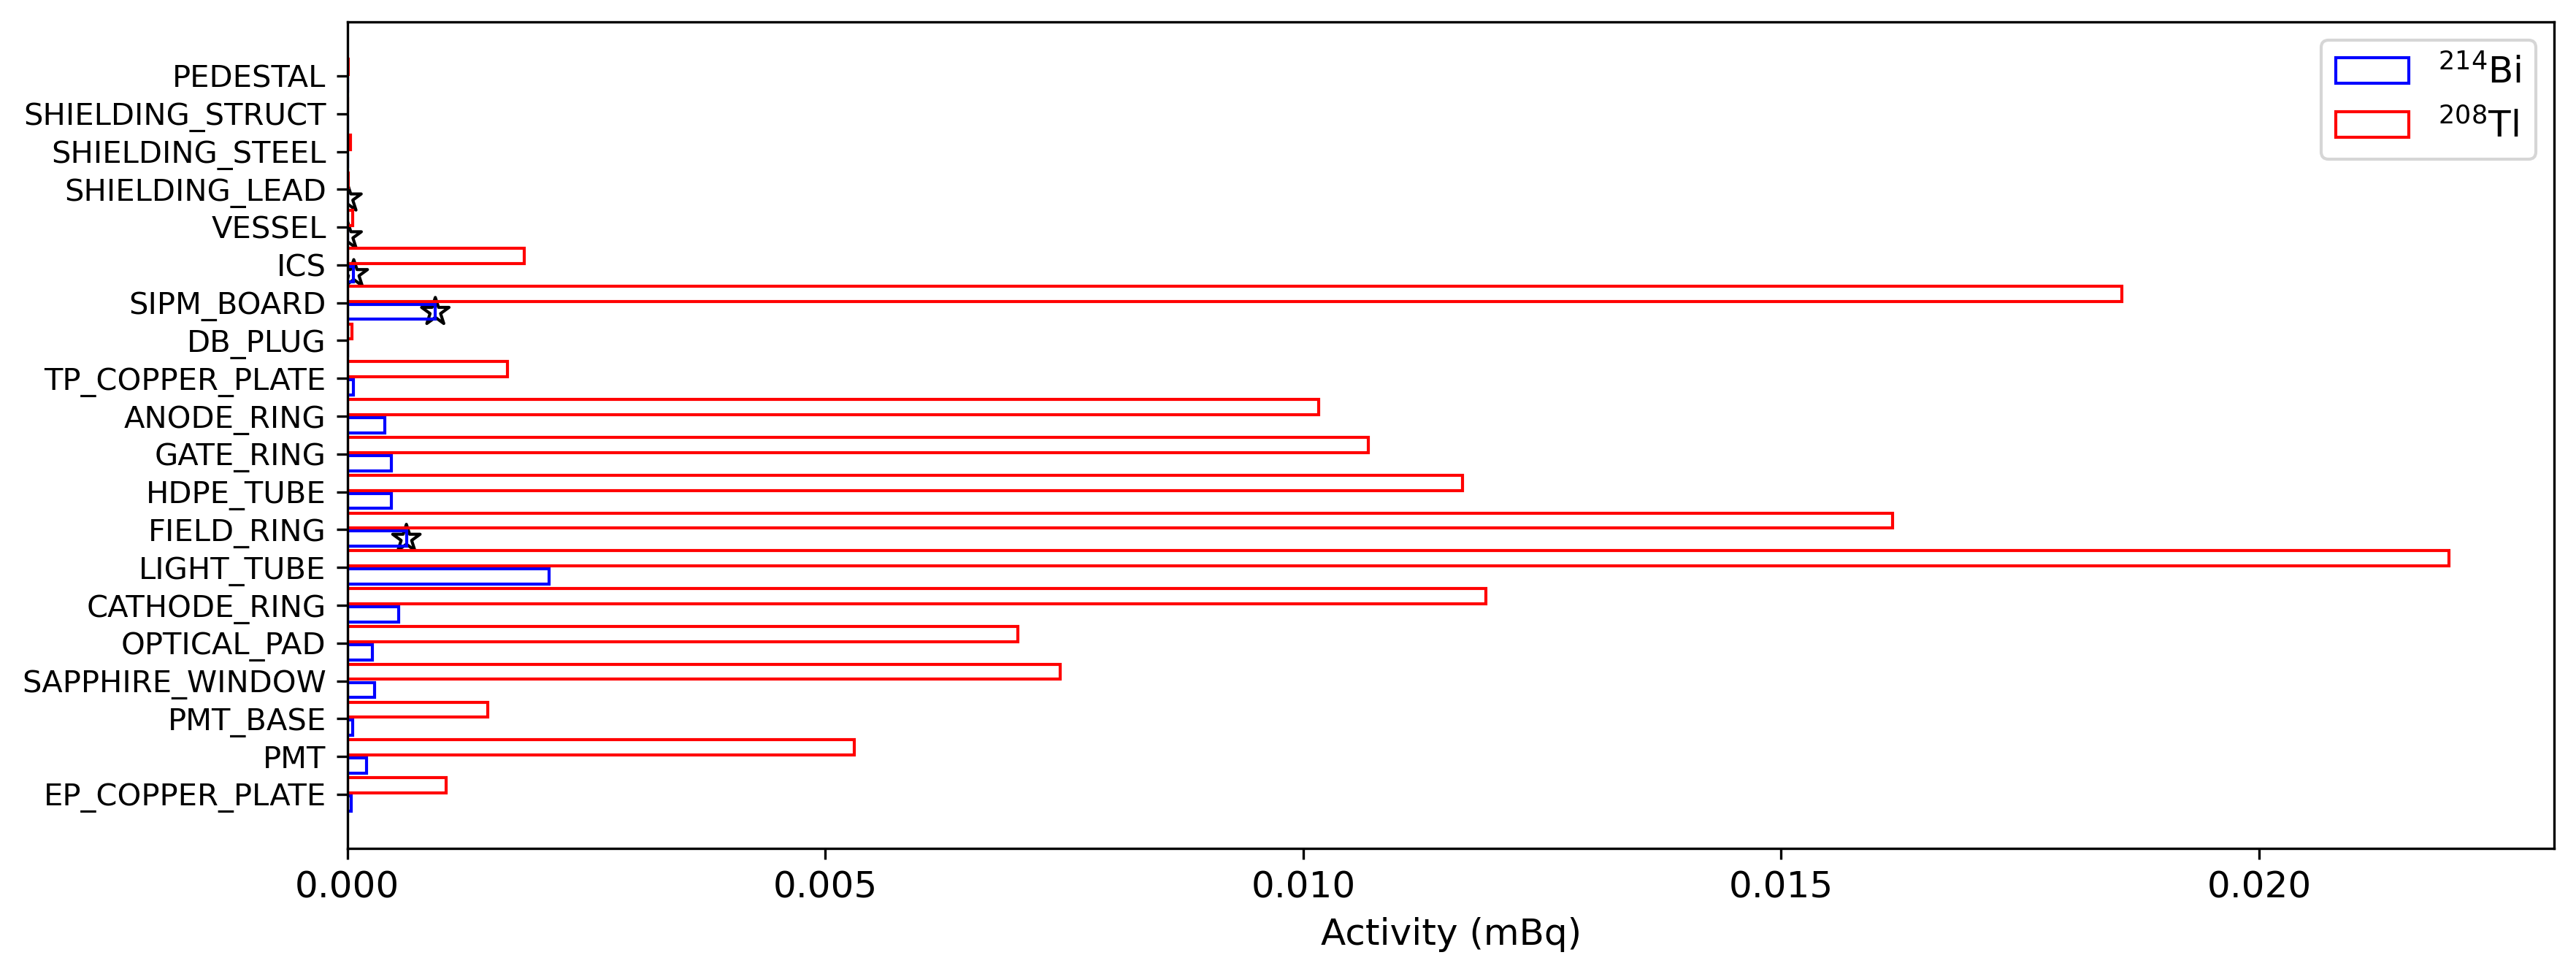

In [5]:
width = 4
dx = 10
X = np.arange(0, dx*len(v), dx)


plt.figure(figsize=[13, 5])

# bi
plt.barh(X-width/2.-0.1*width, bi.MCEfficiency, height=width, color="none", edgecolor="b", label=r"$^{214}$Bi")
colors = np.repeat("none", len(bi.upperlim)).astype(object)
colors[bi.upperlim] = "black"
plt.scatter(bi.MCEfficiency, X-width/2.-0.1*width, marker="*", edgecolors=colors, facecolor="none", s=90)

plt.barh(X+width/2.+0.1*width, tl.MCEfficiency, height=width, color="none", edgecolor="r", label=r"$^{208}$Tl")

plt.yticks(X, v, rotation=0, fontsize="small")
plt.xlabel("Activity (mBq)")
plt.legend();

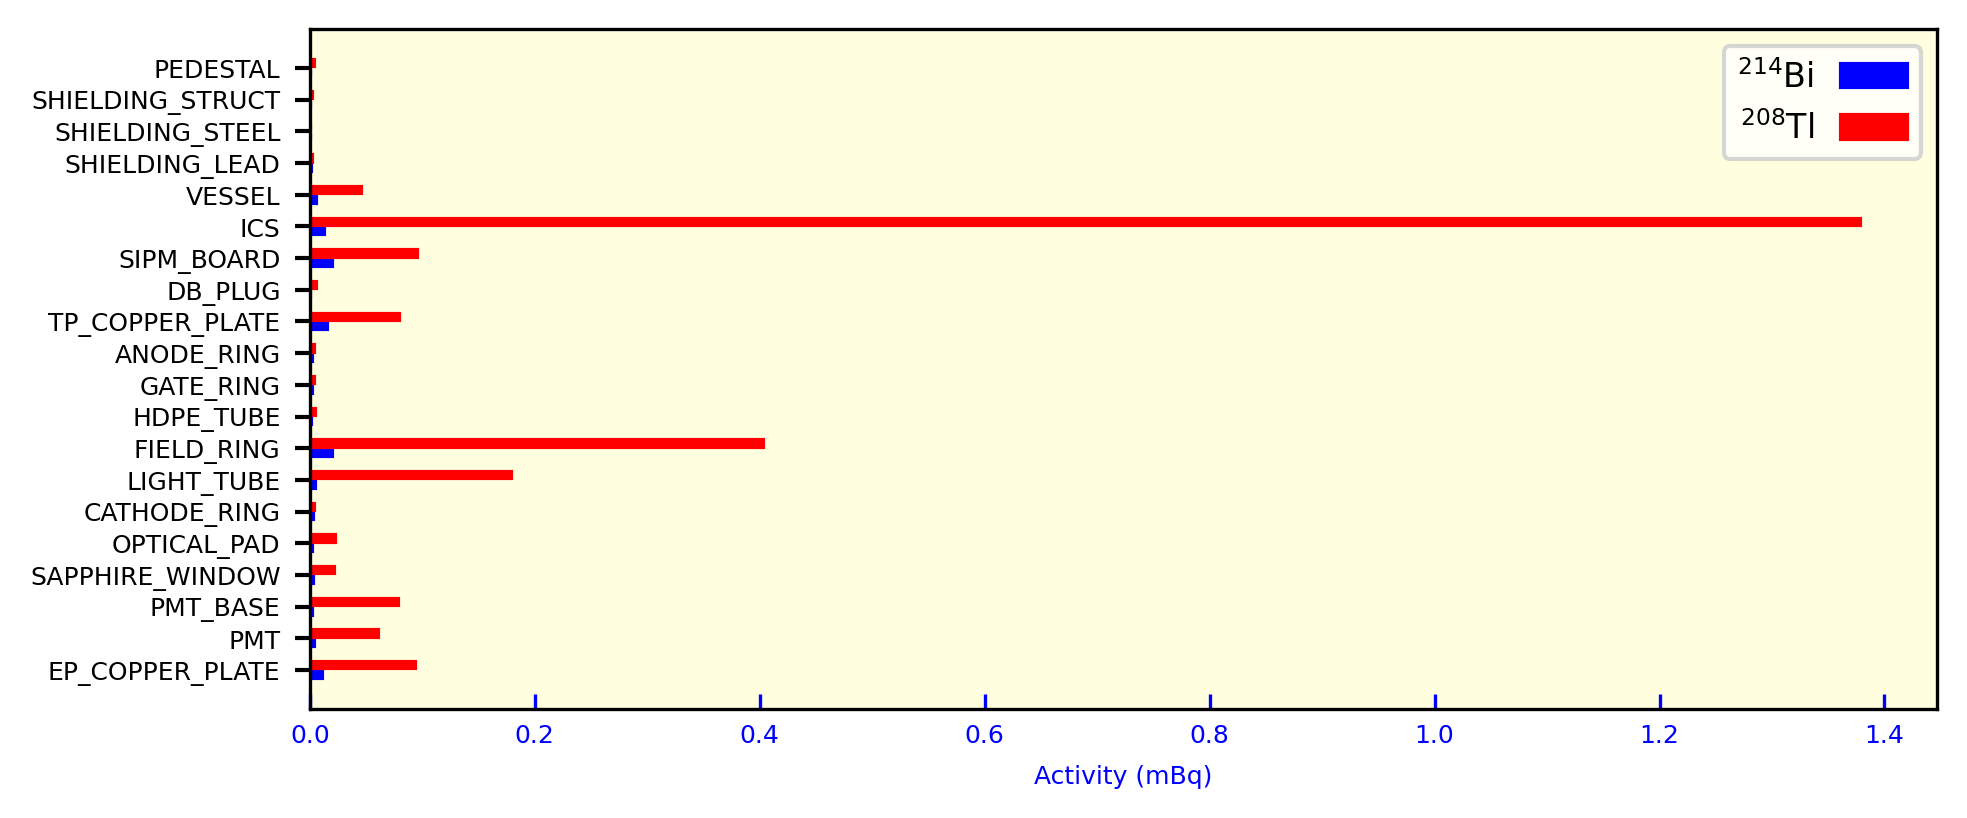

In [6]:
width = 2
dx = 10
X = np.arange(0, dx*len(v), dx)
tick_width = 1

plt.rcParams["font.size"] = 6

# plot
fig, ax1 = plt.subplots(figsize=[7, 3])

# 214Bi
color="b"
b1 = ax1.barh(X-width/2.-tick_width/2., bi.TotalActivity*bi.MCEfficiency, height=width,
              color=color, edgecolor=color, label=r"$^{214}$Bi")
# colors = np.repeat("none", len(bi.upperlim)).astype(object)
# colors[bi.upperlim] = color
# ax1.scatter(bi.MCEfficiency, X-width/2.-0.1*width, marker="*", edgecolors=colors, facecolor="none", s=50)
ax1.set_yticks(X)
ax1.set_yticklabels(v, rotation=0)
ax1.tick_params(axis='y', width=tick_width)

ax1.tick_params(axis='x', labelcolor=color, direction="in", color=color)
ax1.ticklabel_format(axis="x", scilimits=(-1, 0))
ax1.set_xlabel("Activity (mBq)", color=color)

ax1.set_facecolor("lightyellow")

# 208Tl
color="r"
b2 = ax1.barh(X+width/2.+tick_width/2., tl.TotalActivity*tl.MCEfficiency, height=width,
              color=color, edgecolor=color, label=r"$^{208}$Tl")

ax1.legend([b1, b2], [b1.get_label(), b2.get_label()], loc="upper right", fontsize=8, markerfirst=False);

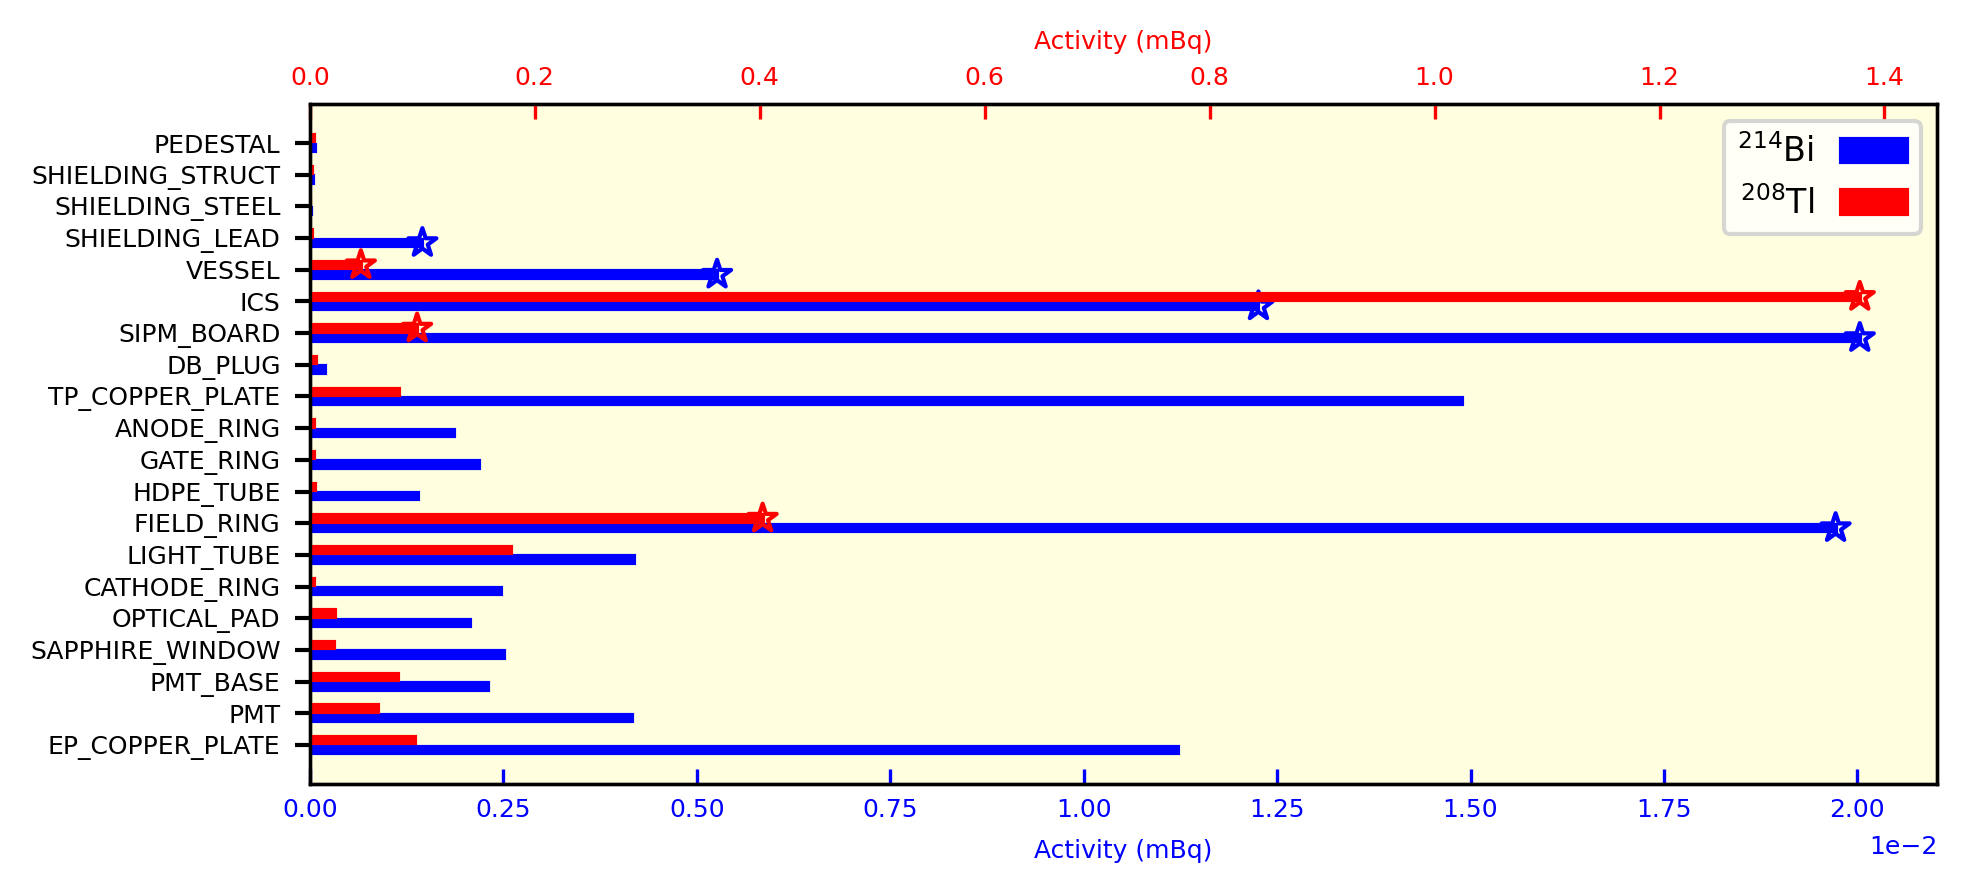

In [7]:
width = 2
dx = 10
X = np.arange(0, dx*len(v), dx)
tick_width = 1

plt.rcParams["font.size"] = 6

# plot
fig, ax1 = plt.subplots(figsize=[7, 3])

# 214Bi
color="b"
b1 = ax1.barh(X-width/2.-tick_width/2., bi.TotalActivity*bi.MCEfficiency, height=width,
              color=color, edgecolor=color, label=r"$^{214}$Bi")
colors = np.repeat("none", len(bi.upperlim)).astype(object)
colors[bi.upperlim] = color
ax1.scatter(bi.TotalActivity*bi.MCEfficiency, X-width/2.-tick_width/2., marker="*", 
            edgecolors=colors, facecolor="none", s=50)

ax1.set_yticks(X)
ax1.set_yticklabels(v, rotation=0)
ax1.tick_params(axis='y', width=tick_width)

ax1.tick_params(axis='x', labelcolor=color, direction="in", color=color)
ax1.ticklabel_format(axis="x", scilimits=(-1, 0))
ax1.set_xlabel("Activity (mBq)", color=color)

ax1.set_facecolor("lightyellow")

# 208Tl
ax2 = ax1.twiny()
color="r"
b2 = ax2.barh(X+width/2.+tick_width/2., tl.TotalActivity*tl.MCEfficiency, height=width,
              color=color, edgecolor=color, label=r"$^{208}$Tl")
ax2.tick_params(axis='x', labelcolor=color, direction="in", color=color)
colors = np.repeat("none", len(tl.upperlim)).astype(object)
colors[tl.upperlim] = color
ax2.scatter(tl.TotalActivity*tl.MCEfficiency, X+width/2.+tick_width/2., marker="*", 
            edgecolors=colors, facecolor="none", s=50)

ax2.set_xlabel("Activity (mBq)", color=color)

ax2.legend([b1, b2], [b1.get_label(), b2.get_label()], loc="upper right", fontsize=8, markerfirst=False);

In [10]:
# # assumes activity in mBq
# year = (3600. * 24. * 365)/1000.

# background = "214Bi"
# nevents_per_outfile = 100
# exposure = 10. * year

# table = pd.read_excel(filename, sheet_name=background).set_index("VOLUME")


# nevents_per_file = 50
# max_events = 1e5

# table.loc[:, "total"] = (table.activity*exposure)                 .apply(np.ceil).astype(int)
# table.loc[:, "eff"]   = (table.activity*exposure*table.efficiency).apply(np.ceil).astype(int)
# table.loc[:, "file"]  = np.minimum((nevents_per_file/table.efficiency), max_events).apply(np.ceil).astype(int)
# table.loc[:, "sim"]   = (table.file*table.efficiency)                              .apply(np.ceil).astype(int)
# table.loc[:, "nfiles"]= (table.total/table.file)                  .apply(np.ceil).astype(int)
# table.loc[:, "contrib (%)"] = (table.eff/table.eff.sum())*100

In [12]:
# assumes activity in mBq
year = (3600. * 24. * 365)/1000.

background = "208Tl"
exposure = 40. * year

min_total_events = 100
min_sim_per_file = 1e6
max_sim_per_file = 1e7
min_events_per_file = 10
max_events_per_file = 50

table = pd.read_excel(filename, sheet_name=background).set_index("G4Volume")
table.loc[:,           "total"] = (table.TotalActivity*table.MCEfficiency*exposure).apply(np.ceil).astype(int)
# correct total
table.loc[:,           "total"] = np.maximum(table.total, min_total_events)
table.loc[:,       "total_sim"] = table.total/table.MCEfficiency
table.loc[:,    "sim_per_file"] = min_sim_per_file
table.loc[:, "events_per_file"] = np.minimum(table.sim_per_file*table.MCEfficiency, max_events_per_file)
table.loc[:, "events_per_file"] = np.maximum(table.events_per_file, min_events_per_file)
if background == "208Tl":
    table.loc["FIELD_RING", "events_per_file"] = 200
    table.loc[       "ICS", "events_per_file"] = 250
table.loc[:, "sim_per_file"]    = (table.events_per_file/table.MCEfficiency).apply(np.ceil).astype(int)
table.loc[:, "sim_per_file"]    = np.minimum(table.sim_per_file, max_sim_per_file)
table.loc[:, "events_per_file"] = (table.sim_per_file*table.MCEfficiency).apply(np.ceil).astype(int)
table.loc[:,       "nfiles"]    = (table.total_sim/table.sim_per_file) .apply(np.ceil).astype(int)

In [14]:
table.total_sim

G4Volume
EP_COPPER_PLATE    1.15E+08
PMT                1.44E+07
PMT_BASE           6.75E+07
SAPPHIRE_WINDOW    3.62E+06
OPTICAL_PAD        4.02E+06
CATHODE_RING       4.40E+05
LIGHT_TUBE         1.03E+07
FIELD_RING         3.14E+07
HDPE_TUBE          4.72E+05
GATE_RING          4.54E+05
ANODE_RING         4.54E+05
TP_COPPER_PLATE    5.95E+07
DB_PLUG            1.49E+08
SIPM_BOARD         6.48E+06
ICS                9.39E+08
VESSEL             1.11E+09
SHIELDING_LEAD     2.74E+08
SHIELDING_STEEL    1.11E+07
SHIELDING_STRUCT   8.93E+08
PEDESTAL           6.36E+08
Name: total_sim, dtype: float64

In [10]:
2**31

2147483648

In [34]:
# background = "208Tl"

# events_per_volume    = 1e6
# min_sim_per_file     = 1e6
# max_events_per_file  = 100
# max_files_per_volume = 1e4

# table = pd.read_excel(filename, sheet_name=background).set_index("VOLUME")

# table.loc[:, "contrib"] = (table.activity*table.efficiency)/np.sum(table.activity*table.efficiency)

# table.loc[:, "sim_per_file"]    = min_sim_per_file
# table.loc[:, "events_per_file"] = np.minimum(table.sim_per_file*table.efficiency, max_events_per_file)
# # correct sim_per_file
# table.loc[:, "sim_per_file"] = (table.events_per_file/table.efficiency)

# table.loc[:, "nfiles"] = np.minimum((events_per_volume/table.events_per_file)
#                                     , max_files_per_volume).apply(np.ceil).astype(int)
# table.loc[:, "total_events"] = (table.events_per_file*table.nfiles).apply(np.ceil).astype(int)